### step 1 : data collection

In [15]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def download_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
download_housing_data()

In [16]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housingdf = load_housing_data()

In [17]:
# show sample of data
housingdf.sample(15)
# check data description 
# https://www.kaggle.com/camnugent/california-housing-prices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5812,-118.26,34.13,37.0,196.0,74.0,194.0,68.0,1.2188,218800.0,<1H OCEAN
19144,-122.70,38.33,26.0,1887.0,381.0,1060.0,364.0,3.0078,160400.0,<1H OCEAN
17602,-121.88,37.30,42.0,1867.0,398.0,927.0,389.0,4.3250,247000.0,<1H OCEAN
10465,-117.76,33.48,38.0,3832.0,809.0,1332.0,636.0,5.0044,381200.0,<1H OCEAN
8573,-118.41,33.90,39.0,2040.0,336.0,926.0,351.0,7.5552,500001.0,<1H OCEAN
15508,-117.08,33.14,11.0,1430.0,292.0,921.0,294.0,4.2357,160900.0,<1H OCEAN
9957,-122.29,38.40,28.0,2024.0,340.0,844.0,309.0,4.7833,361100.0,INLAND
15779,-122.41,37.78,52.0,254.0,72.0,153.0,29.0,3.8625,350000.0,NEAR BAY
1106,-121.60,39.80,10.0,1742.0,307.0,721.0,312.0,2.4537,117900.0,INLAND
10416,-117.61,33.63,2.0,4678.0,817.0,1970.0,712.0,6.1078,219000.0,<1H OCEAN


In [18]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Step 2 : Eploratory Data Analysis

In [19]:
housingdf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
# check for nans or missing values
housingdf.isna().sum() # notice that there are some nans , we may drop them

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
housingdf.dropna(inplace=True)

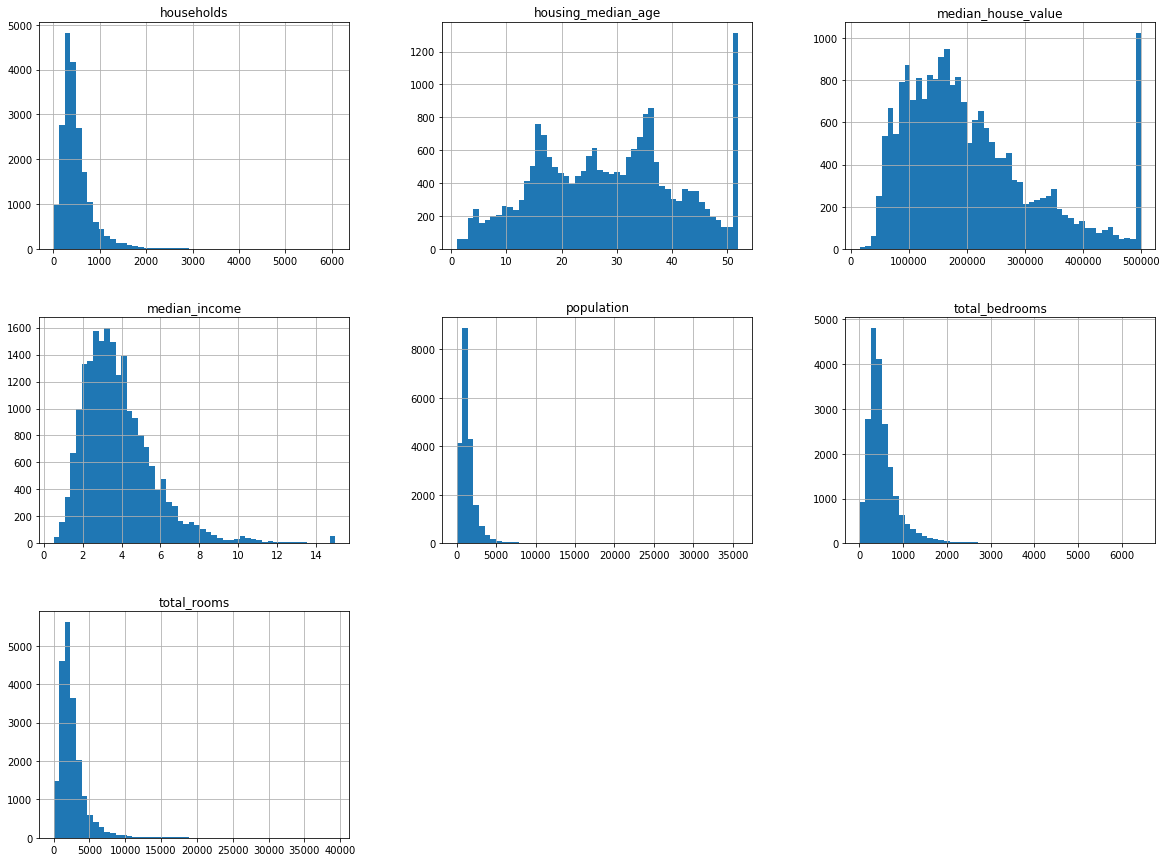

In [22]:
# plot feature distributions
import matplotlib.pyplot as plt
explore_df=housingdf.drop(columns=['ocean_proximity','longitude','latitude'],axis=1)
explore_df.hist(bins=50, figsize=(20,15))
plt.show()

`Notes
1-These attributes have very different scales
2-many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions and also we should scale features`

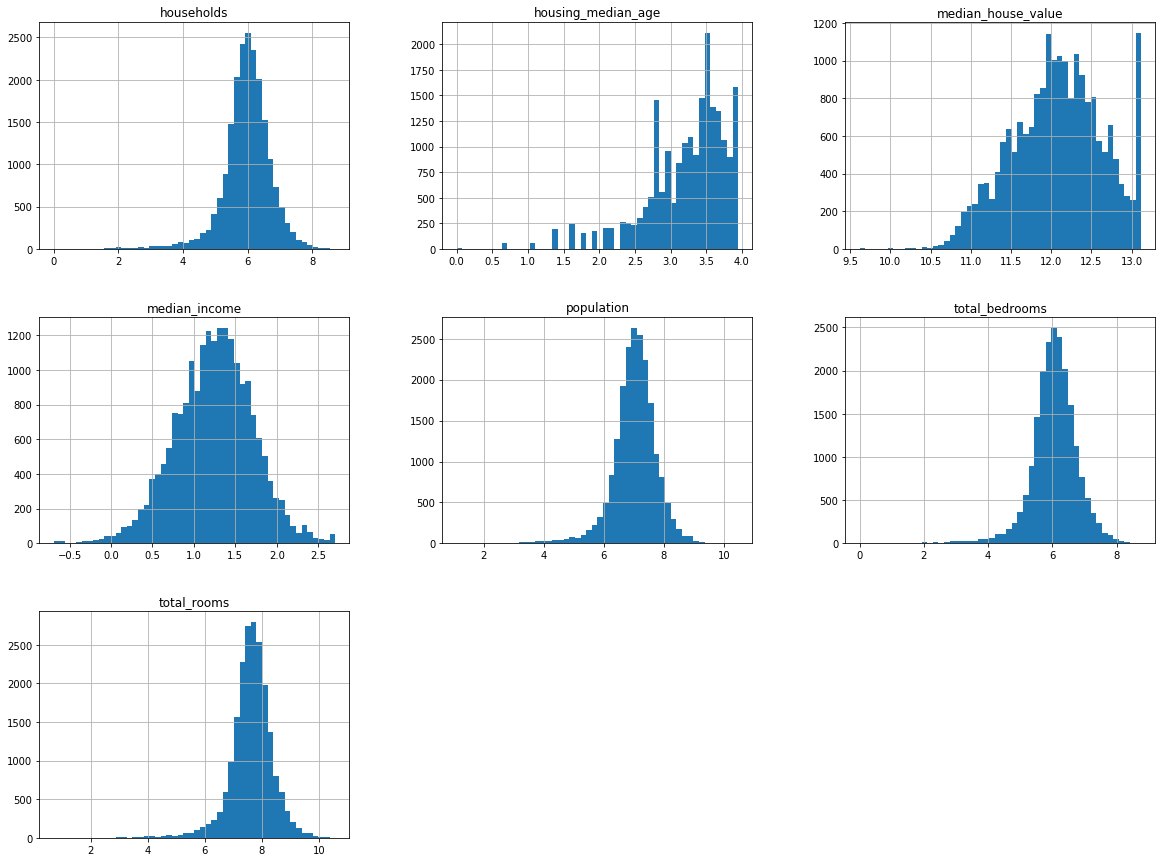

In [23]:
# take log() feature helps solve skewness problem
import numpy as np
explore_df=np.log(explore_df)
explore_df.dropna(inplace=True)
explore_df.hist(bins=50, figsize=(20,15))
plt.show()

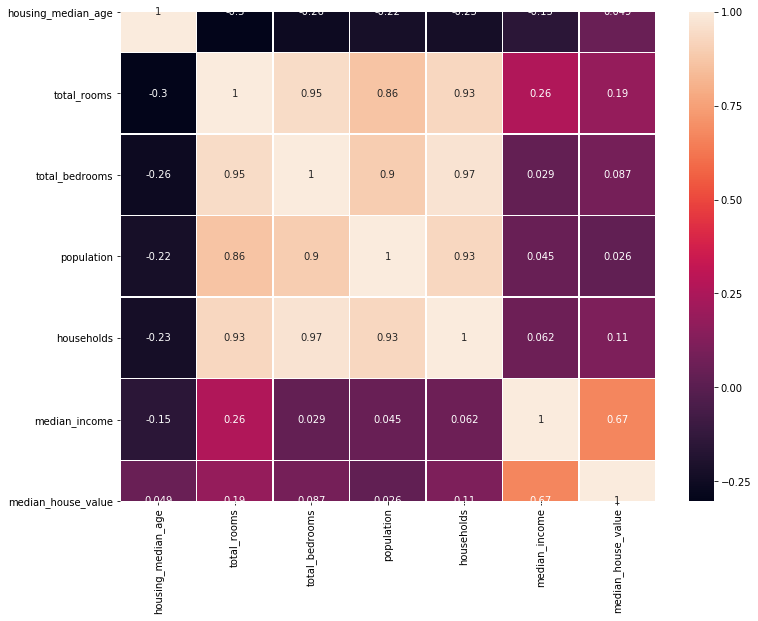

In [24]:
# plot feature corelations
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,9)) 
sns.heatmap(explore_df.corr(),annot=True,ax=ax,linewidths=0.5)

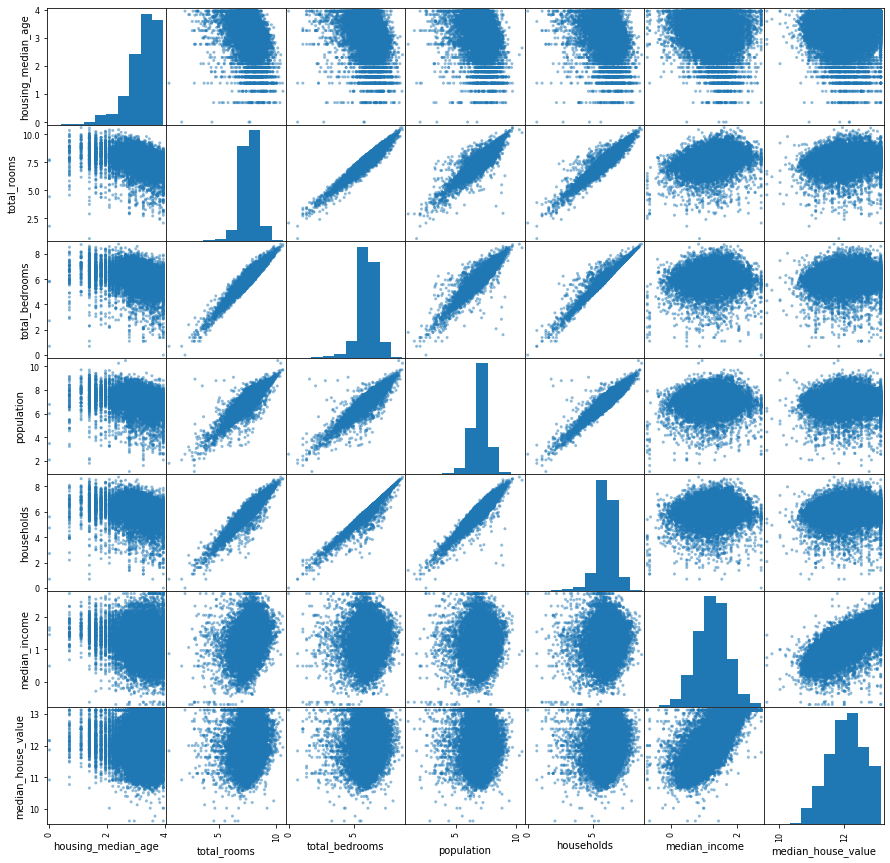

In [25]:
# more correlation plots
from pandas.plotting import scatter_matrix
scatter_matrix(explore_df, figsize=(15, 15))
plt.show()

In [26]:
final_df=pd.concat([explore_df,pd.get_dummies(housingdf['ocean_proximity'])],axis=1)
final_df.sample(15)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10112,3.401197,7.375256,5.726848,6.739337,5.733341,1.506208,12.392967,1,0,0,0,0
19846,3.135494,7.541683,5.894403,6.962243,5.823046,1.168107,11.438202,0,1,0,0,0
19170,2.302585,9.187276,7.176255,8.227108,7.124478,1.875810,12.690657,1,0,0,0,0
6326,3.496508,8.605570,6.858565,8.168203,6.817831,1.482468,12.137258,1,0,0,0,0
5018,3.178054,6.771936,5.768321,6.270988,5.730100,-0.072141,11.929001,1,0,0,0,0
3495,3.555348,7.047517,5.220356,6.608001,5.181784,1.747633,12.304106,1,0,0,0,0
3243,2.772589,7.286876,5.991465,7.090910,5.950643,0.452794,10.911445,0,1,0,0,0
10044,2.639057,8.113127,6.410175,7.224753,6.331502,1.300192,11.983554,0,1,0,0,0
15056,3.135494,8.658519,7.137278,8.041735,7.091742,1.129044,11.853674,1,0,0,0,0
16141,3.951244,8.035279,6.588926,7.400010,6.495266,1.049177,12.795802,0,0,0,1,0


### step 3 Model training and evaluation

In [27]:
# feature scaling and model training
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
min_max_scaler = preprocessing.MinMaxScaler()
X = final_df.loc[:,final_df.columns!='median_house_value'] # features
Y = final_df['median_house_value'] # label
X = min_max_scaler.fit_transform(X)
linear_reg = LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
linear_reg.fit(xtrain,ytrain)
preds=linear_reg.predict(xtest)
print('model rmse = ',np.mean((preds-ytest)**2))

model rmse =  0.10619137220200808


In [30]:
# test model with cross validation
# visualize rmse scores
import plotly.graph_objects as go
scores = cross_val_score(linear_reg, X , Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = -scores
fig = go.Figure(
    data=[go.Bar(x=[i for i in range(5)],y=list(rmse_scores)[5:])],
    layout_title_text="cv versus model error"
)
fig.show()

In [32]:
import pickle
pkl_filename = "lr_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(linear_reg, file)

In [33]:
# Load from file
with open(pkl_filename, 'rb') as file:
    lr_model = pickle.load(file)

In [35]:
preds=lr_model.predict(xtest)
print('model rmse = ',np.mean((preds-ytest)**2))

model rmse =  0.10619137220200808
